# Sleep Analysis

This is the situation that we will explore.

<img src="img.png" width="70%"></img>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
df = pd.read_csv("/Users/vincent/Downloads/sleep_deprived_coding.csv")

In [2]:
(df
  .groupby('sleep')
  .agg(n=('id', 'count'),
       mean_unit_tests=('passed_unit_tests', np.mean),
       mean_asserts=('passed_asserts', np.mean),
       mean_user_stories=('tackled_user_stories', np.mean),))

,n,mean_unit_tests,mean_asserts,mean_user_stories
sleep,,,,
deprived,15,1.133333,3.266667,1.600000
normal,21,2.904762,4.952381,2.714286


In [3]:
def reshuffle(dataf):
    return (dataf
             .sample(36)
             .reset_index(drop=True)
             .assign(sleep=lambda d: np.where(d.index < 15, 'deprived', 'normal')))

def calc_diff(dataf):
    agg = (dataf
           .groupby('sleep')
           .agg(mean_unit_tests=('passed_unit_tests', np.mean),
                mean_asserts=('passed_asserts', np.mean),
                mean_user_stories=('tackled_user_stories', np.mean),)).T
    return agg['deprived'] - agg['normal']

<img src="img2.png" width="90%"></img>

In [4]:
n = 1000
results = np.zeros((n, 3))
for i in range(n):
    results[i, :] = calc_diff(reshuffle(df))

In [5]:
df_diff = pd.DataFrame(results, 
                       columns=['diff_unit_tests', 
                                'diff_asserts', 
                                'diff_user_stories'])

Let's make a plot of this.

In [35]:
dict(calc_diff(df))

{'mean_unit_tests': -1.7714285714285714,
 'mean_asserts': -1.685714285714286,
 'mean_user_stories': -1.1142857142857143}

In [28]:
agg = (df
       .assign(gpa=lambda d: d['gpa'] < d['gpa'].mean())
       .groupby('gpa')
       .agg(mean_unit_tests=('passed_unit_tests', np.mean),
            mean_asserts=('passed_asserts', np.mean),
            mean_user_stories=('tackled_user_stories', np.mean))).T

effect_dict = dict(agg[False] - agg[True])
effect_dict

{'mean_unit_tests': 0.19480519480519476,
 'mean_asserts': 0.29220779220779214,
 'mean_user_stories': 0.05844155844155852}

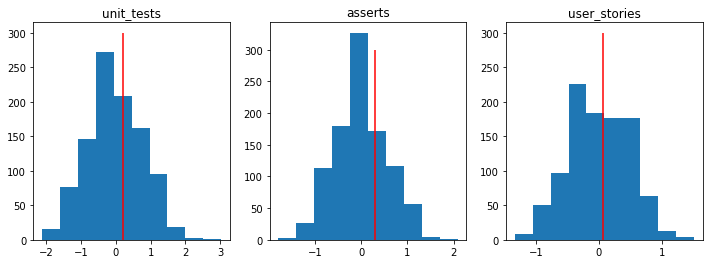

In [29]:
plt.figure(figsize=(12, 4))

for idx, name in enumerate(['unit_tests', 'asserts', 'user_stories']):
    plt.subplot(131 + idx)
    plt.hist(df_diff[f'diff_{name}'])
    plt.vlines(effect_dict[f'mean_{name}'], 0, 300, color='red')
    plt.title(name)

In [30]:
effect_dict

{'mean_unit_tests': 0.19480519480519476,
 'mean_asserts': 0.29220779220779214,
 'mean_user_stories': 0.05844155844155852}

In [32]:
df_diff.assign(limit=lambda d: d['diff_unit_tests'] < 0.19480)['limit'].mean()

0.625

In [33]:
df_diff.assign(limit=lambda d: d['diff_asserts'] < 0.29220)['limit'].mean()

0.713

In [34]:
df_diff.assign(limit=lambda d: d['diff_user_stories'] < 0.05844)['limit'].mean()

0.566